<a href="https://colab.research.google.com/github/camilotorron/TestNotebooks/blob/main/CR7_Goal_LRpred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import pandas as pd
pd.set_option('display.max_rows', None)

In [121]:
data = pd.read_csv('https://raw.githubusercontent.com/paramitadas1/Predict-goal-or-miss--Chritiano-Ronaldo/main/train.csv')
data.shape

(20764, 27)

In [122]:
data.head()

,is_goal,match_event_id,location_x,location_y,remaining_min,power_of_shot1,knockout_match2,game_season,remaining_sec1,distance_of_shot1,...,lat_lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot,knockout_match1,remaining_sec2,distance_of_shot2
0,0,NaN,-49.0,NaN,7.0,3.0,0.0,2014-15,14.0,39.0,...,"46.667324, -94.419250",shot - 3,shot - 3,21400351,1610612747,38.20,3.0,0.0,29.2,38.400
1,0,505.0,-59.0,191.0,1.0,4.0,0.0,2002-03,9.0,39.0,...,"33.552026, -112.071667",shot - 48,NaN,20200471,1610612747,87.64,4.0,NaN,NaN,39.000
2,1,309.0,0.0,0.0,2.0,3.0,NaN,1997-98,58.0,20.0,...,"41.845137, -87.660450",shot - 39,NaN,29700335,1610612747,74.64,3.0,NaN,NaN,20.000
3,0,106.0,6.0,242.0,0.0,1.0,1.0,2007-08,21.0,44.0,...,"42.330507, -71.074655",shot - 50,NaN,40700406,1610612747,0.00,1.0,1.0,21.0,111.728
4,0,284.0,-120.0,82.0,9.0,3.0,1.0,2003-04,36.0,34.0,...,NaN,shot - 3,shot - 3,40300316,1610612747,9.00,NaN,1.0,36.0,34.000


In [123]:
data.isna().sum()

is_goal                      0
match_event_id            1044
location_x                 954
location_y                1042
remaining_min             1043
power_of_shot1             240
knockout_match2            266
game_season               3919
remaining_sec1             213
distance_of_shot1         1069
area_of_shot              1011
shot_basics               1098
range_of_shot             1084
team_name                 1031
date_of_game              1041
home_away                 1019
shot_id_number            1049
lat_lng                   1068
type_of_shot                 0
type_of_combined_shot    10454
match_id                     0
team_id                      0
remaining_min.1           1051
power_of_shot             1028
knockout_match1           1034
remaining_sec2            1033
distance_of_shot2         1050
dtype: int64

In [124]:
data.dtypes

is_goal                    int64
match_event_id           float64
location_x               float64
location_y               float64
remaining_min            float64
power_of_shot1           float64
knockout_match2          float64
game_season               object
remaining_sec1           float64
distance_of_shot1        float64
area_of_shot              object
shot_basics               object
range_of_shot             object
team_name                 object
date_of_game              object
home_away                 object
shot_id_number           float64
lat_lng                   object
type_of_shot              object
type_of_combined_shot     object
match_id                   int64
team_id                    int64
remaining_min.1          float64
power_of_shot            float64
knockout_match1          float64
remaining_sec2           float64
distance_of_shot2        float64
dtype: object

In [125]:
data['is_goal'].value_counts()

0    11517
1     9247
Name: is_goal, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc284ec0810>,
      dtype=object)

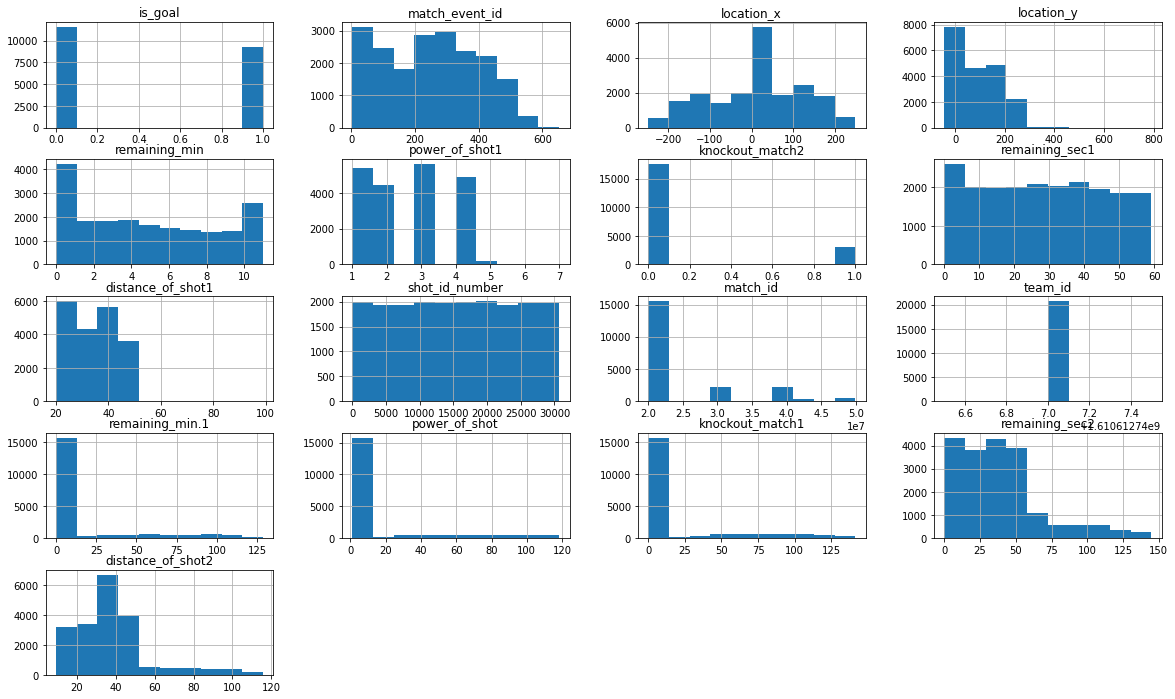

In [126]:
import seaborn as sns

data.hist(figsize = (20,12))

In [127]:
data.describe()

,is_goal,match_event_id,location_x,location_y,remaining_min,power_of_shot1,knockout_match2,remaining_sec1,distance_of_shot1,shot_id_number,match_id,team_id,remaining_min.1,power_of_shot,knockout_match1,remaining_sec2,distance_of_shot2
count,20764.000000,19720.000000,19810.000000,19722.000000,19721.000000,20524.000000,20498.000000,20551.000000,19695.000000,19715.000000,2.076400e+04,2.076400e+04,19713.000000,19736.000000,19730.000000,19731.000000,19714.000000
mean,0.445338,249.876521,7.613226,91.114948,4.899194,2.523582,0.146014,28.347291,33.434323,15363.881917,2.473565e+07,1.610613e+09,18.197720,15.814455,16.551423,38.833780,38.767763
std,0.497015,150.345354,110.072094,87.831362,3.455363,1.153974,0.353129,17.481840,9.367075,8854.892935,7.736206e+06,0.000000e+00,29.441788,29.441110,35.045627,29.730557,18.728670
min,0.000000,2.000000,-248.000000,-44.000000,0.000000,1.000000,0.000000,0.000000,20.000000,3.000000,2.000001e+07,1.610613e+09,0.000000,1.000000,0.000000,0.000000,9.400000
25%,0.000000,111.000000,-67.000000,4.000000,2.000000,1.000000,0.000000,13.000000,25.000000,7714.500000,2.050010e+07,1.610613e+09,3.000000,2.000000,0.000000,17.000000,26.000000
50%,0.000000,254.000000,0.000000,74.000000,5.000000,3.000000,0.000000,28.000000,35.000000,15406.000000,2.090036e+07,1.610613e+09,6.000000,3.000000,0.000000,35.000000,36.000000
75%,1.000000,369.000000,95.000000,160.000000,8.000000,3.000000,0.000000,43.000000,41.000000,22985.500000,2.960019e+07,1.610613e+09,11.000000,4.000000,1.000000,52.000000,44.000000
max,1.000000,653.000000,248.000000,791.000000,11.000000,7.000000,1.000000,59.200000,99.000000,30697.000000,4.990009e+07,1.610613e+09,128.761600,118.360000,141.352320,144.785600,115.728000


In [128]:
data.columns

Index(['is_goal', 'match_event_id', 'location_x', 'location_y',
       'remaining_min', 'power_of_shot1', 'knockout_match2', 'game_season',
       'remaining_sec1', 'distance_of_shot1', 'area_of_shot', 'shot_basics',
       'range_of_shot', 'team_name', 'date_of_game', 'home_away',
       'shot_id_number', 'lat_lng', 'type_of_shot', 'type_of_combined_shot',
       'match_id', 'team_id', 'remaining_min.1', 'power_of_shot',
       'knockout_match1', 'remaining_sec2', 'distance_of_shot2'],
      dtype='object')

In [129]:
df = data[['is_goal', 'location_x', 'location_y',
       'power_of_shot1', 'distance_of_shot1', 'area_of_shot', 'home_away',
       'type_of_shot']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc28b23b910>,
      dtype=object)

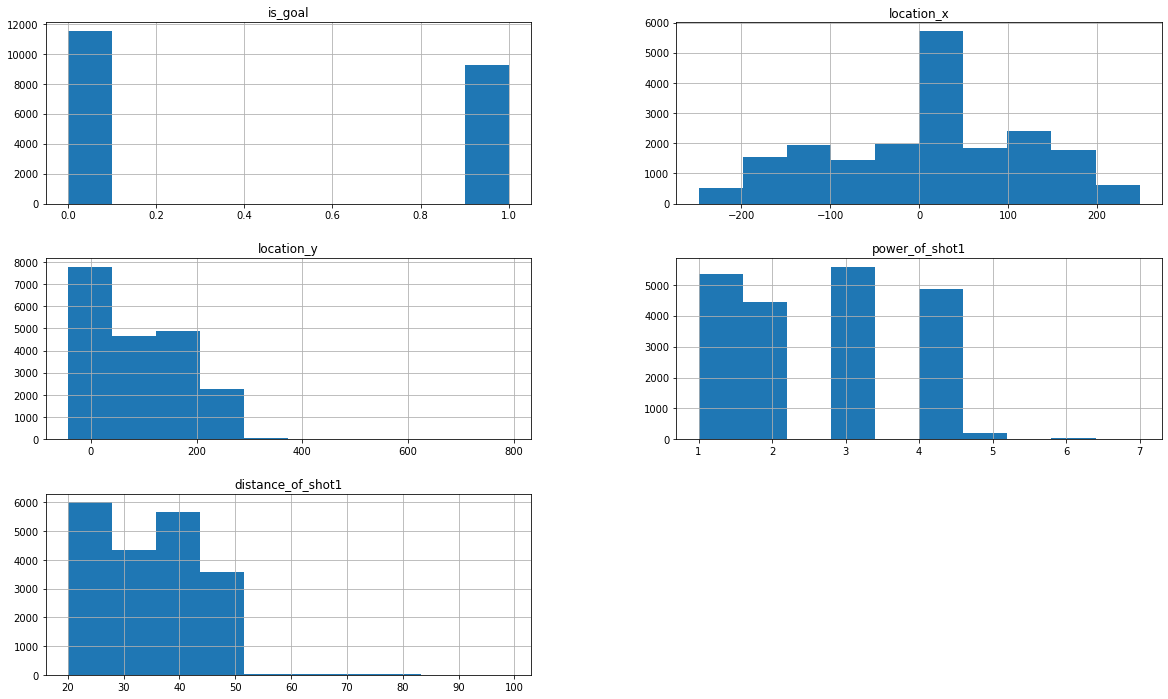

In [130]:
df.hist(figsize = (20,12))

In [131]:
df.head()

,is_goal,location_x,location_y,power_of_shot1,distance_of_shot1,area_of_shot,home_away,type_of_shot
0,0,-49.0,NaN,3.0,39.0,Center(C),MANU @ MIN,shot - 3
1,0,-59.0,191.0,4.0,39.0,Center(C),MANU @ PHX,shot - 48
2,1,0.0,0.0,3.0,20.0,Center(C),MANU @ CHI,shot - 39
3,0,6.0,242.0,1.0,44.0,Center(C),MANU @ BOS,shot - 50
4,0,-120.0,82.0,3.0,34.0,Left Side(L),MANU vs. MIN,shot - 3


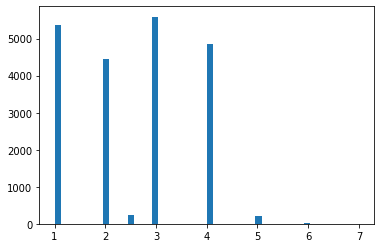

In [192]:
plt.hist(df['power_of_shot1'], bins = 50)
plt.show()

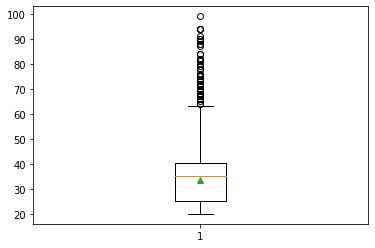

In [197]:
plt.boxplot(df['distance_of_shot1'].dropna(), showmeans = True)
plt.show()

In [214]:
corr = df.corr()
corr['is_goal']


is_goal              1.000000
location_x          -0.007192
location_y          -0.145694
power_of_shot1      -0.040894
distance_of_shot1   -0.196214
home_away            0.015556
type_of_shot        -0.029458
Name: is_goal, dtype: float64

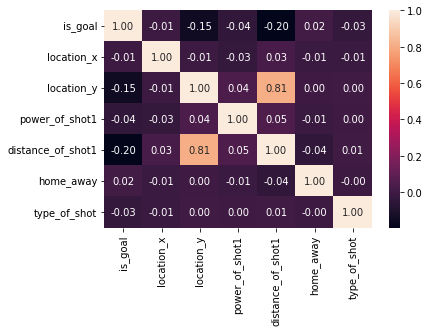

In [217]:
sns.heatmap(corr, annot = True,fmt='0.2f')

In [212]:
df['home_away'].value_counts()

0    11131
1     9633
Name: home_away, dtype: int64

In [133]:
df.isna().sum()

is_goal                 0
location_x            954
location_y           1042
power_of_shot1        240
distance_of_shot1    1069
area_of_shot         1011
home_away            1019
type_of_shot            0
dtype: int64

In [134]:
df['type_of_shot'] = df['type_of_shot'].str.replace('shot - ','' )
df['type_of_shot'] = df['type_of_shot'].astype('int64')
df.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


is_goal                int64
location_x           float64
location_y           float64
power_of_shot1       float64
distance_of_shot1    float64
area_of_shot          object
home_away             object
type_of_shot           int64
dtype: object

In [135]:
import numpy as np
conditions = [(df['home_away'].str.contains('vs.')==True), (df['home_away'].str.contains('vs.')==False)]
values = [1, 0]

df['home_away'] = np.select(conditions, values)
df['home_away'] .value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0    11131
1     9633
Name: home_away, dtype: int64

In [138]:
df.dtypes

is_goal                int64
location_x           float64
location_y           float64
power_of_shot1       float64
distance_of_shot1    float64
area_of_shot          object
home_away              int64
type_of_shot           int64
dtype: object

In [140]:
df['area_of_shot'].isna().value_counts()

False    19753
True      1011
Name: area_of_shot, dtype: int64

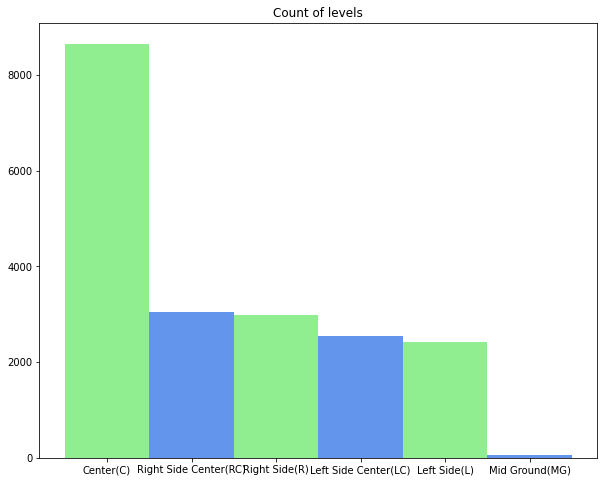

In [143]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.bar(df['area_of_shot'].value_counts().index,df['area_of_shot'].value_counts().values,width = 1, color=["lightgreen", "cornflowerblue"])
plt.title('Count of levels')
plt.show()

## Fill missing values

In [142]:
df.isna().sum()

is_goal                 0
location_x            954
location_y           1042
power_of_shot1        240
distance_of_shot1    1069
area_of_shot         1011
home_away               0
type_of_shot            0
dtype: int64

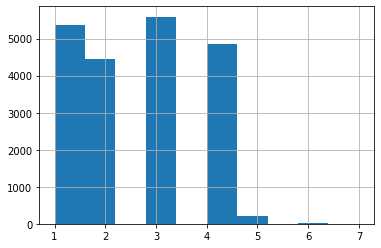

In [144]:
df['power_of_shot1'].hist()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


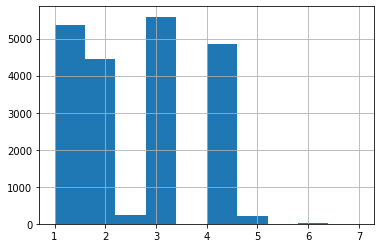

In [147]:
from sklearn.impute import SimpleImputer

#For numeric values
mean = SimpleImputer(strategy='mean')
df[['power_of_shot1']] = mean.fit_transform(df[['power_of_shot1']])
df['power_of_shot1'].hist()


In [149]:
df.isna().sum()

is_goal                 0
location_x            954
location_y           1042
power_of_shot1          0
distance_of_shot1    1069
area_of_shot         1011
home_away               0
type_of_shot            0
dtype: int64

In [155]:
from sklearn.impute import KNNImputer

knnImp = KNNImputer(n_neighbors = 4)
df[['location_x', 'location_y','distance_of_shot1']] = knnImp.fit_transform(df[['location_x', 'location_y','distance_of_shot1']])
df[['location_x', 'location_y','distance_of_shot1']].isna().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


location_x           0
location_y           0
distance_of_shot1    0
dtype: int64

In [156]:
df.isna().sum()

is_goal                 0
location_x              0
location_y              0
power_of_shot1          0
distance_of_shot1       0
area_of_shot         1011
home_away               0
type_of_shot            0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


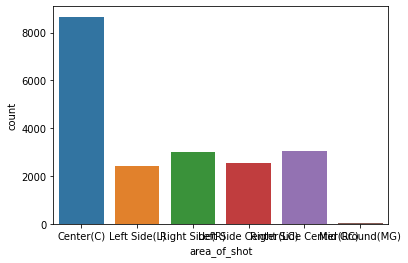

In [158]:
sns.countplot(df['area_of_shot'])

In [159]:
from statistics import mode
moda = mode(df['area_of_shot'])
df['area_of_shot'].fillna(mode, inplace = True)
df.isna().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


is_goal              0
location_x           0
location_y           0
power_of_shot1       0
distance_of_shot1    0
area_of_shot         0
home_away            0
type_of_shot         0
dtype: int64

## Build the model

In [173]:
cat_df = df['area_of_shot']
num_df = df.drop('area_of_shot', axis = 1)
df_categorical_encoded = pd.get_dummies(cat_df, drop_first=True)
df_new = pd.concat([num_df, df_categorical_encoded], axis=1)

In [174]:
y= df_new['is_goal']
X = df_new.drop('is_goal', axis = 1)
(X.shape, y.shape)

((20764, 12), (20764,))

In [177]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit_transform(X)

array([[-0.52408871,  0.80469965,  0.41526661, ..., -0.05153494,
        -0.41566339, -0.41047072],
       [-0.61661834,  1.14901335,  1.28691028, ..., -0.05153494,
        -0.41566339, -0.41047072],
       [-0.07069352, -1.04311716,  0.41526661, ..., -0.05153494,
        -0.41566339, -0.41047072],
       ...,
       [ 1.15995054, -0.74471196,  1.28691028, ..., -0.05153494,
        -0.41566339,  2.43622736],
       [-0.41305315,  1.66548389,  0.41526661, ..., -0.05153494,
        -0.41566339, -0.41047072],
       [-0.07069352, -1.04311716,  0.41526661, ..., -0.05153494,
        -0.41566339, -0.41047072]])

In [178]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=123)
((X_train.shape, y_train.shape),(X_test.shape, y_test.shape))

(((15573, 12), (15573,)), ((5191, 12), (5191,)))

In [185]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression(solver = 'lbfgs')
lreg.fit(X_train,y_train)
y_pred = lreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [186]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print('The accuracy is: {}'.format(acc))

The accuracy is: 0.6041225197457137


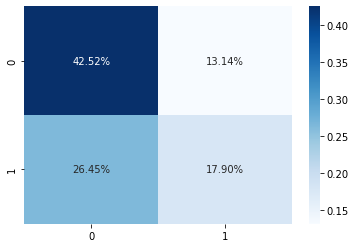

In [187]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm/np.sum(cm), annot = True,fmt='.2%', cmap = 'Blues')